# Science Plan

Objective - test hypothesis that weather events can affect the bottom currents that control the bending and rise heights of Hydrothermal plumes 

## Step One - Find Some Data

* Check out the loaded zip file. It contains plume bending data (direction of bending and magnitude of bending), vertical velocity in the plume, a vent temperature data file, and some weather data.  Note these files contain data for two time frames - Oct 2010 and Oct to Dec 2011. 
    i. BendData*.txt - these two files are the basic bending data - three columns = {direction as angle from north, bending magnitude as angle from vertical, julian date}
    ii. Other files are .mat format so Dax or I may need to help with these. I’ll try to load more information on them soon.
* I also loaded two powerpoints of talks that came out of the pilot study.  Some of the material is irrelevant.
* I don’t have a handy tidal data file -- bottom current and pressure from tides -- but this should exist at least as model data
* At Ocean Networks Canada’s NEPTUNE observatory, they had current meters (ADCP) at a regional circulation mooring about 1 km N to NE of the COVIS site that collected data in Oct 2010 and in late 2011 to early 2012. 
* I did include the weather data I found. This came from the NOAA and National Weather Center’s records.  Feel free to do your own hunt for data!
* At some point, you might want the actual grids of COVIS data.  Right now most data is in Matlab’s .mat format and takes a bit of processing to get images, centerlines, and bending data.  But this will be useful to lengthen the data series (COVIS took data in Oct 2010 and form Oct 2011 to some time in late 2014 or early 2015).


## Relevant PowerPoint Slides

Add Important PowerPoint Slides

In [30]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits import mplot3d
import pandas as pd
from datetime import datetime

## Step Two - Plot The Data
* What patterns do you see?  
* What else can you do with this data?
* Do the different data sets correlate?

**Plume Bending Data**

**Time series of direction and magnitude:**
For current data, the magnitude would be a speed.  For the plumes, what we have is an angle from the vertical.  So for the other plots, we will need to assume a distance over which that angle applies.

2010

In [31]:
df_BD2010 = pd.read_csv('BendData2010Oct.txt', sep="  ", header=None, engine='python')
df_BD2010.columns = ["Direction", "Angle from Vertical", "Julian Day"]
df_BD2010

,Direction,Angle from Vertical,Julian Day
0,-93.051558,13.635896,272.646030
1,-60.735930,14.644623,272.666863
2,49.475743,17.030499,273.000197
3,55.417778,16.240515,273.003600
4,81.618981,13.820356,273.006979
5,89.734940,21.962090,273.166875
6,90.602834,24.475303,273.170243
7,112.843655,12.408705,273.173623
8,17.603394,6.742980,273.333530
9,-8.069500,8.306768,273.336933


Text(0, 0.5, 'Direction (Degrees from North)')

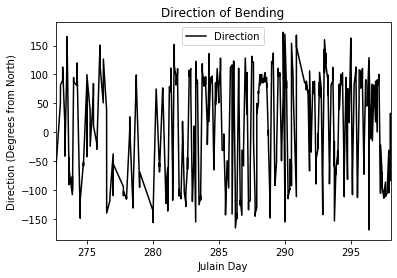

In [32]:
DirPlot2010 = df_BD2010.plot(kind='line',x='Julian Day',y="Direction",color='black')
DirPlot2010.set_title("Direction of Bending")
DirPlot2010.set_xlabel('Julain Day')
DirPlot2010.set_ylabel('Direction (Degrees from North)')

Text(0, 0.5, 'Angle from Vertical (Degress)')

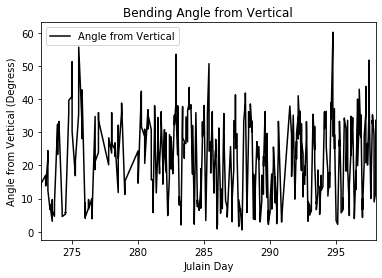

In [33]:
AFVPlot2010 = df_BD2010.plot(kind='line',x='Julian Day',y="Angle from Vertical",color='black')
AFVPlot2010.set_title("Bending Angle from Vertical")
AFVPlot2010.set_xlabel('Julain Day')
AFVPlot2010.set_ylabel('Angle from Vertical (Degress)')

Text(0, 0.5, 'Degress')

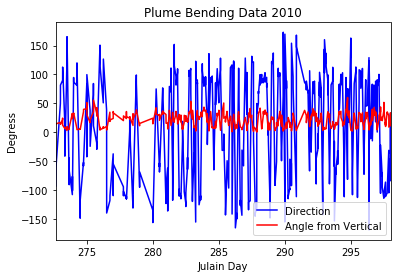

In [34]:
DirAFVPlot2010 = df_BD2010.plot(kind='line',x='Julian Day',y=["Direction", "Angle from Vertical"],color=['blue','red'])
DirAFVPlot2010.set_title("Plume Bending Data 2010")
DirAFVPlot2010.set_xlabel('Julain Day')
DirAFVPlot2010.set_ylabel('Degress')

2011

In [35]:
df_BD2011 = pd.read_csv('BendData2011OctDec.txt', sep="  ", header=None, engine='python')
df_BD2011.columns = ["Direction", "Angle from Vertical", "Julian Day"]
df_BD2011

,Direction,Angle from Vertical,Julian Day
0,-69.274518,39.405222,270.000440
1,94.758456,82.545996,270.002986
2,81.247468,71.208543,270.005509
3,-74.198384,38.409642,270.125451
4,-60.191636,40.344897,270.128021
5,-63.345944,44.463187,270.130544
6,179.229398,5.493614,270.250451
7,173.506592,5.801195,270.253102
8,-161.954476,7.310095,270.255776
9,-53.693790,40.359175,270.375451


Text(0, 0.5, 'Direction (Degrees from North)')

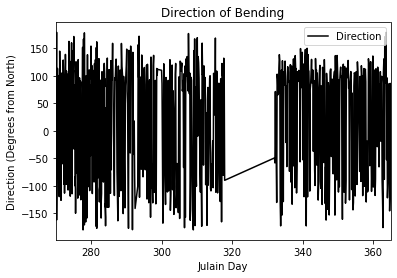

In [36]:
DirPlot2011 = df_BD2011.plot(kind='line',x='Julian Day',y="Direction",color='black')
DirPlot2011.set_title("Direction of Bending")
DirPlot2011.set_xlabel('Julain Day')
DirPlot2011.set_ylabel('Direction (Degrees from North)')

Text(0, 0.5, 'Angle from Vertical (Degress)')

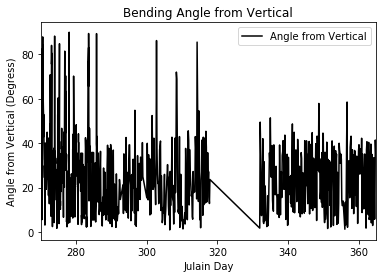

In [37]:
AFVPlot2011 = df_BD2011.plot(kind='line',x='Julian Day',y="Angle from Vertical",color='black')
AFVPlot2011.set_title("Bending Angle from Vertical")
AFVPlot2011.set_xlabel('Julain Day')
AFVPlot2011.set_ylabel('Angle from Vertical (Degress)')

Text(0, 0.5, 'Degress')

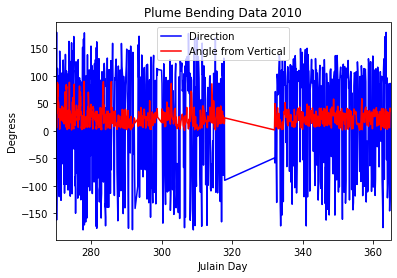

In [38]:
DirAFVPlot2011 = df_BD2011.plot(kind='line',x='Julian Day',y=["Direction", "Angle from Vertical"],color=['blue','red'])
DirAFVPlot2011.set_title("Plume Bending Data 2010")
DirAFVPlot2011.set_xlabel('Julain Day')
DirAFVPlot2011.set_ylabel('Degress')

**Time series of East and North components:**  
For current information (direction and speed), this is a straightforward conversion using the standard polar coordinate equations with the direction as the angle and the speed as the range.  Note, however, that all our directions are angles from North (+y axis direction) and that python is likely to define angles relative to the +x or -y axis, so you may need to apply a correction before using polar coordinates.  For plumes, you need the 3D polar coordinates (two angles and a range). The direction is the azimuth or angle in the 2D plane while the bending magnitude is the angle from vertical.  You will need to assume a “unit” height.

2010

2011

Centerline Vertical Flow Rate 

In [39]:
df_CVFR2010 = pd.read_csv('CenterlineVerticalFlowRate2010.csv', sep=",", header=None, engine='python', usecols = [6,7,8])
df_CVFR2010.columns = ["Date", "Time", "Flow Rate"]
df_CVFR2010['Date Time'] = df_CVFR2010['Date'] + ' ' + df_CVFR2010['Time']
df_CVFR2010["Date Time"] = pd.to_datetime(df_CVFR2010["Date Time"])
df_CVFR2010 = df_CVFR2010.drop(["Date", "Time"], axis=1)
df_CVFR2010 = df_CVFR2010.set_index('Date Time')
df_CVFR2010

,Flow Rate
Date Time,
2010-09-30 20:31:40,0.256602
2010-10-01 00:15:18,0.210930
2010-10-01 04:15:17,0.264184
2010-10-01 08:15:14,0.237096
2010-10-01 12:15:20,0.217171
2010-10-01 16:15:19,0.233607
NaT,NaN
2010-10-02 00:16:01,0.214385
2010-10-02 06:16:00,0.283314


Text(0, 0.5, 'Flow Rate (m/s)')

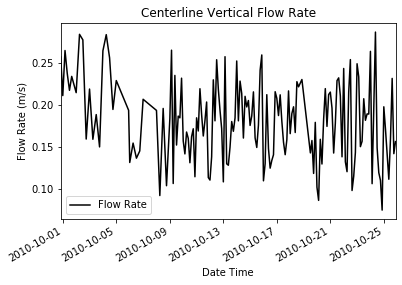

In [40]:
CVFRPlot = df_CVFR2010.plot(kind='line',color='black')
CVFRPlot.set_title("Centerline Vertical Flow Rate")
CVFRPlot.set_xlabel('Date Time')
CVFRPlot.set_ylabel('Flow Rate (m/s)')

Ras Data

In [41]:
df_RAS2010 = pd.read_csv('RasData2010.csv', sep=",", header=None, engine='python', usecols = [6,7,8])
df_RAS2010.columns = ["Date", "Time", "Temperature"]
df_RAS2010['Date Time'] = df_RAS2010['Date'] + ' ' + df_RAS2010['Time']
df_RAS2010["Date Time"] = pd.to_datetime(df_RAS2010["Date Time"])
df_RAS2010 = df_RAS2010.drop(["Date", "Time"], axis=1)
df_RAS2010 = df_RAS2010.set_index('Date Time')
df_RAS2010

,Temperature
Date Time,
2010-10-04 20:45:00,45.145333
2010-10-04 21:45:00,44.430833
2010-10-04 22:30:00,46.009111
2010-10-04 23:15:00,45.106000
2010-10-05 00:00:00,46.197333
2010-10-05 01:00:00,46.393167
2010-10-05 01:45:00,46.950444
2010-10-05 02:30:00,45.461778
2010-10-05 03:30:00,45.967667


Text(0, 0.5, 'Temperature (°C)')

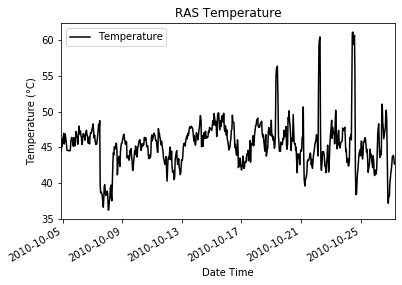

In [42]:
RASPlot = df_RAS2010.plot(kind='line',color='black')
RASPlot.set_title("RAS Temperature")
RASPlot.set_xlabel('Date Time')
RASPlot.set_ylabel('Temperature (°C)')

**Weather Data**

Weather Data 2010 C46036

In [43]:
df_WD2010C = pd.read_csv('WeatherC2010.csv', sep=",", header=None, engine='python', usecols = [6,7,8,9,10,11,12,13,14,15])
df_WD2010C.columns = ["Date", "Time", "Julian Day", "Wave Height", "Wind Direction", "Wind Speed", "Wind Gust Speed", "Atmospheric Pressure","Air Temperature"]
df_WD2010C['Date Time'] = df_WD2010C['Date'] + ' ' + df_WD2010C['Time']
df_WD2010C["Date Time"] = pd.to_datetime(df_WD2010C["Date Time"])
df_WD2010C = df_WD2010C.drop(["Date", "Time"], axis=1)
df_WD2010C = df_WD2010C.set_index('Date Time')
df_WD2010C

,Julian Day,Wave Height,Wind Direction,Wind Speed,Wind Gust Speed,Atmospheric Pressure,Air Temperature
Date Time,,,,,,,
2010-09-30 23:43:00,273.98819,3.46,157.0,4.6,6.0,1011.1,13.7
2010-10-01 00:43:00,274.02986,3.14,143.0,5.3,7.1,1010.1,13.5
2010-10-01 01:43:00,274.07153,2.87,154.0,6.6,8.7,1009.1,13.5
2010-10-01 02:43:00,274.11319,2.97,161.0,6.9,10.4,1009.0,13.6
2010-10-01 03:43:00,274.15486,3.01,165.0,8.8,10.5,1008.5,13.7
2010-10-01 04:43:00,274.19653,2.60,184.0,8.8,11.1,1008.7,13.9
2010-10-01 05:43:00,274.23819,2.79,185.0,8.9,11.1,1008.2,14.1
2010-10-01 06:43:00,274.27986,2.90,179.0,9.6,11.3,1007.5,14.3
2010-10-01 07:43:00,274.32153,3.17,193.0,9.9,12.8,1007.0,14.6


Text(0, 0.5, 'Wave Height')

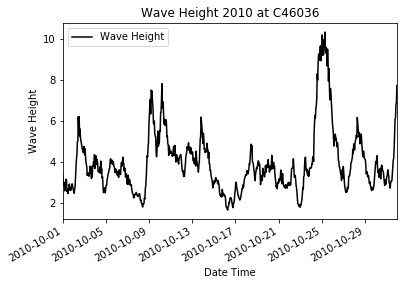

In [44]:
WH2010CPlot = df_WD2010C.plot(kind='line',color='black', y='Wave Height')
WH2010CPlot.set_title("Wave Height 2010 at C46036")
WH2010CPlot.set_xlabel('Date Time')
WH2010CPlot.set_ylabel('Wave Height')

Text(0, 0.5, 'Wind Direction')

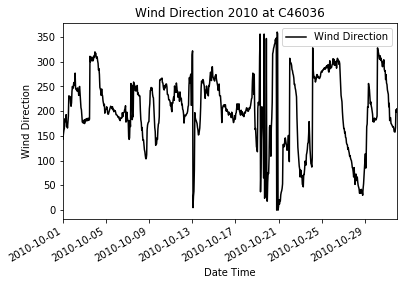

In [45]:
WDir2010CPlot = df_WD2010C.plot(kind='line',color='black', y='Wind Direction')
WDir2010CPlot.set_title("Wind Direction 2010 at C46036")
WDir2010CPlot.set_xlabel('Date Time')
WDir2010CPlot.set_ylabel('Wind Direction')

Text(0, 0.5, 'Wind Speed (m/s)')

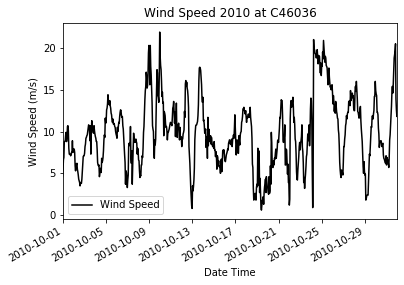

In [46]:
WS2010CPlot = df_WD2010C.plot(kind='line',color='black', y='Wind Speed')
WS2010CPlot.set_title("Wind Speed 2010 at C46036")
WS2010CPlot.set_xlabel('Date Time')
WS2010CPlot.set_ylabel('Wind Speed (m/s)')

Text(0, 0.5, 'Wind Gust Speed (m/s)')

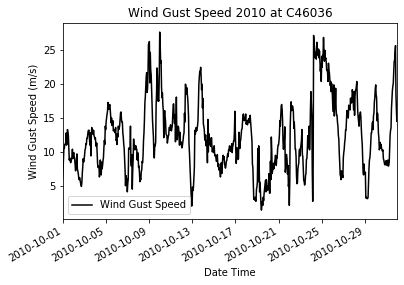

In [47]:
WGS2010CPlot = df_WD2010C.plot(kind='line',color='black', y='Wind Gust Speed')
WGS2010CPlot.set_title("Wind Gust Speed 2010 at C46036")
WGS2010CPlot.set_xlabel('Date Time')
WGS2010CPlot.set_ylabel('Wind Gust Speed (m/s)')

Text(0, 0.5, 'Atmospheric Pressure')

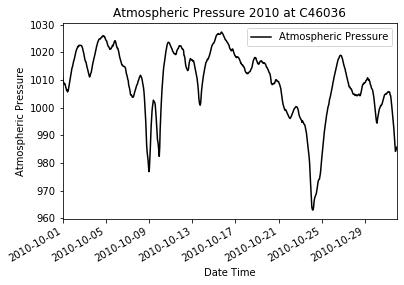

In [48]:
AP2010CPlot = df_WD2010C.plot(kind='line',color='black', y='Atmospheric Pressure')
AP2010CPlot.set_title("Atmospheric Pressure 2010 at C46036")
AP2010CPlot.set_xlabel('Date Time')
AP2010CPlot.set_ylabel('Atmospheric Pressure')

Text(0, 0.5, 'Air Temperature')

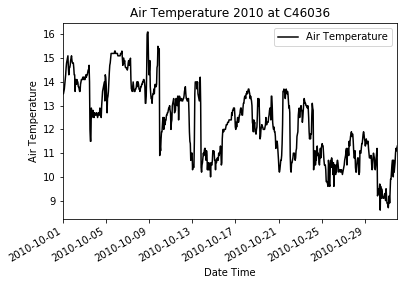

In [49]:
AT2010CPlot = df_WD2010C.plot(kind='line',color='black', y='Air Temperature')
AT2010CPlot.set_title("Air Temperature 2010 at C46036")
AT2010CPlot.set_xlabel('Date Time')
AT2010CPlot.set_ylabel('Air Temperature')

Weather Data 2011 C46036

In [50]:
df_WD2011C = pd.read_csv('WeatherC2011.csv', sep=",", header=None, engine='python', usecols = [6,7,8,9,10,11,12,13,14,15])
df_WD2011C.columns = ["Date", "Time", "Julian Day", "Wave Height", "Wind Direction", "Wind Speed", "Wind Gust Speed", "Atmospheric Pressure","Air Temperature"]
df_WD2011C['Date Time'] = df_WD2011C['Date'] + ' ' + df_WD2011C['Time']
df_WD2011C["Date Time"] = pd.to_datetime(df_WD2011C["Date Time"])
df_WD2011C = df_WD2011C.drop(["Date", "Time"], axis=1)
df_WD2011C = df_WD2011C.set_index('Date Time')
df_WD2011C

,Julian Day,Wave Height,Wind Direction,Wind Speed,Wind Gust Speed,Atmospheric Pressure,Air Temperature
Date Time,,,,,,,
2011-09-25 23:43:00,268.98819,2.55,153.0,12.2,14.6,998.5,14.1
2011-09-26 00:43:00,269.02986,2.62,148.0,12.2,14.5,996.6,13.6
2011-09-26 01:43:00,269.07153,2.99,145.0,15.0,19.1,994.2,13.6
2011-09-26 03:43:00,269.15486,3.74,142.0,17.1,21.6,989.5,13.4
2011-09-26 04:43:00,269.19653,4.12,147.0,16.5,20.8,987.3,13.0
2011-09-26 05:43:00,269.23819,4.63,137.0,17.3,23.3,984.4,12.9
2011-09-26 06:43:00,269.27986,4.90,157.0,14.0,17.6,982.6,13.9
2011-09-26 07:43:00,269.32153,5.22,187.0,10.0,12.5,981.5,14.7
2011-09-26 08:43:00,269.36319,5.07,205.0,11.5,14.3,981.0,14.5


Text(0, 0.5, 'Wave Height')

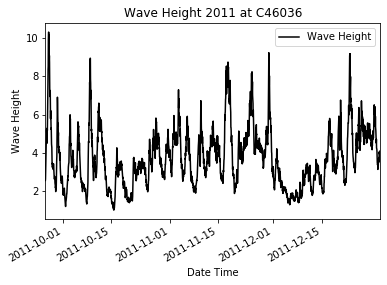

In [51]:
WH2011CPlot = df_WD2011C.plot(kind='line',color='black', y='Wave Height')
WH2011CPlot.set_title("Wave Height 2011 at C46036")
WH2011CPlot.set_xlabel('Date Time')
WH2011CPlot.set_ylabel('Wave Height')

Text(0, 0.5, 'Wind Direction')

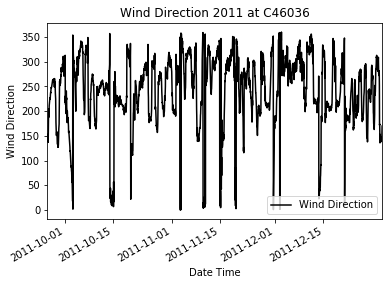

In [52]:
WDir2011CPlot = df_WD2011C.plot(kind='line',color='black', y='Wind Direction')
WDir2011CPlot.set_title("Wind Direction 2011 at C46036")
WDir2011CPlot.set_xlabel('Date Time')
WDir2011CPlot.set_ylabel('Wind Direction')

Text(0, 0.5, 'Wind Speed (m/s)')

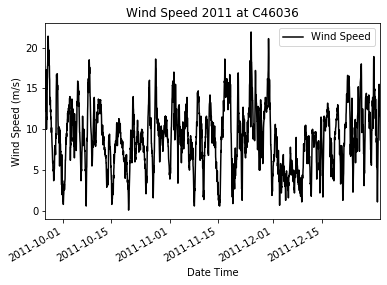

In [53]:
WS2011CPlot = df_WD2011C.plot(kind='line',color='black', y='Wind Speed')
WS2011CPlot.set_title("Wind Speed 2011 at C46036")
WS2011CPlot.set_xlabel('Date Time')
WS2011CPlot.set_ylabel('Wind Speed (m/s)')

Text(0, 0.5, 'Wind Gust Speed (m/s)')

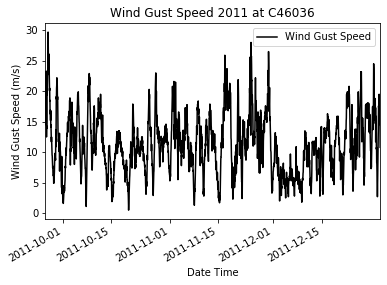

In [54]:
WGS2011CPlot = df_WD2011C.plot(kind='line',color='black', y='Wind Gust Speed')
WGS2011CPlot.set_title("Wind Gust Speed 2011 at C46036")
WGS2011CPlot.set_xlabel('Date Time')
WGS2011CPlot.set_ylabel('Wind Gust Speed (m/s)')

Text(0, 0.5, 'Atmospheric Pressure')

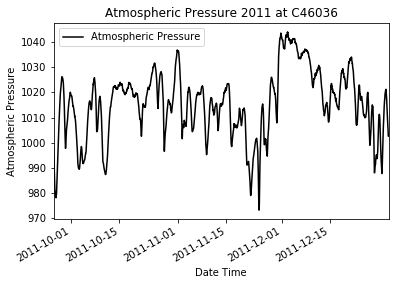

In [55]:
AP2011CPlot = df_WD2011C.plot(kind='line',color='black', y='Atmospheric Pressure')
AP2011CPlot.set_title("Atmospheric Pressure 2011 at C46036")
AP2011CPlot.set_xlabel('Date Time')
AP2011CPlot.set_ylabel('Atmospheric Pressure')

Text(0, 0.5, 'Air Temperature')

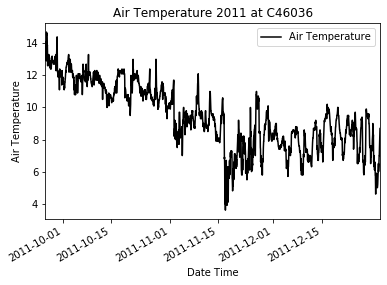

In [56]:
AT2011CPlot = df_WD2011C.plot(kind='line',color='black', y='Air Temperature')
AT2011CPlot.set_title("Air Temperature 2011 at C46036")
AT2011CPlot.set_xlabel('Date Time')
AT2011CPlot.set_ylabel('Air Temperature')

Weather Data 2010 Tillamook

In [57]:
df_WD2010T = pd.read_csv('WeatherT2010.csv', sep=",", header=None, engine='python', usecols = [6,7,8,9,10,11,12,13,14,15])
df_WD2010T.columns = ["Date", "Time", "Julian Day", "Wave Height", "Wind Direction", "Wind Speed", "Wind Gust Speed", "Atmospheric Pressure","Air Temperature"]
df_WD2010T['Date Time'] = df_WD2010T['Date'] + ' ' + df_WD2010T['Time']
df_WD2010T["Date Time"] = pd.to_datetime(df_WD2010T["Date Time"])
df_WD2010T = df_WD2010T.drop(["Date", "Time"], axis=1)
df_WD2010T = df_WD2010T.set_index('Date Time')
df_WD2010T

,Julian Day,Wave Height,Wind Direction,Wind Speed,Wind Gust Speed,Atmospheric Pressure,Air Temperature
Date Time,,,,,,,
2010-09-29 00:07:00,272.00486,NaN,300.0,11.0,NaN,NaN,70.0
2010-09-29 01:30:00,272.06250,NaN,360.0,5.0,NaN,NaN,66.0
2010-09-29 01:50:00,272.07639,NaN,260.0,6.0,NaN,NaN,64.0
2010-09-29 03:10:00,272.13194,NaN,270.0,5.0,NaN,NaN,63.0
2010-09-29 04:10:00,272.17361,NaN,NaN,0.0,NaN,NaN,59.0
2010-09-29 04:30:00,272.18750,NaN,NaN,0.0,NaN,NaN,59.0
2010-09-29 04:50:00,272.20139,NaN,140.0,3.0,NaN,NaN,59.0
2010-09-29 05:10:00,272.21528,NaN,210.0,3.0,NaN,NaN,59.0
2010-09-29 05:30:00,272.22917,NaN,NaN,0.0,NaN,NaN,59.0


Text(0, 0.5, 'Wind Direction')

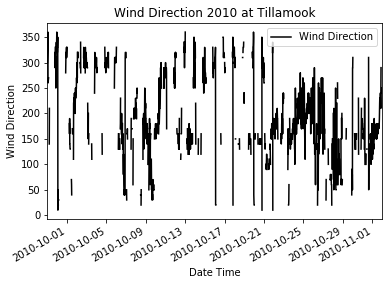

In [58]:
WDir2010TPlot = df_WD2010T.plot(kind='line',color='black', y='Wind Direction')
WDir2010TPlot.set_title("Wind Direction 2010 at Tillamook")
WDir2010TPlot.set_xlabel('Date Time')
WDir2010TPlot.set_ylabel('Wind Direction')

Text(0, 0.5, 'Wind Speed (m/s)')

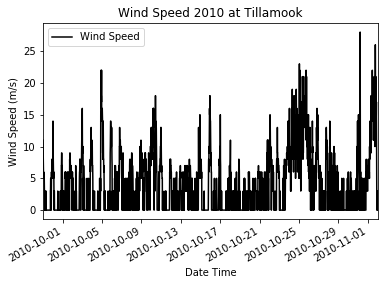

In [59]:
WS2010TPlot = df_WD2010T.plot(kind='line',color='black', y='Wind Speed')
WS2010TPlot.set_title("Wind Speed 2010 at Tillamook")
WS2010TPlot.set_xlabel('Date Time')
WS2010TPlot.set_ylabel('Wind Speed (m/s)')

Text(0, 0.5, 'Wind Gust Speed (m/s)')

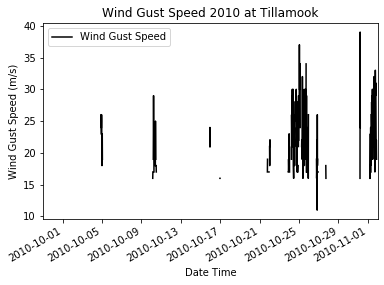

In [60]:
WGS2010TPlot = df_WD2010T.plot(kind='line',color='black', y='Wind Gust Speed')
WGS2010TPlot.set_title("Wind Gust Speed 2010 at Tillamook")
WGS2010TPlot.set_xlabel('Date Time')
WGS2010TPlot.set_ylabel('Wind Gust Speed (m/s)')

Text(0, 0.5, 'Air Temperature')

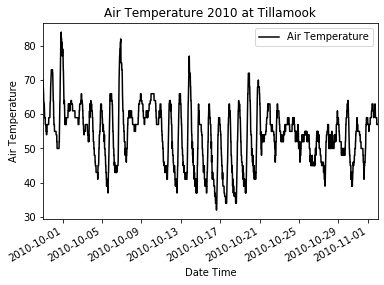

In [61]:
AT2010TPlot = df_WD2010T.plot(kind='line',color='black', y='Air Temperature')
AT2010TPlot.set_title("Air Temperature 2010 at Tillamook")
AT2010TPlot.set_xlabel('Date Time')
AT2010TPlot.set_ylabel('Air Temperature')

Weather Data 2011 Tillamook

In [62]:
df_WD2011T = pd.read_csv('WeatherT2011.csv', sep=",", header=None, engine='python', usecols = [6,7,8,9,10,11,12,13,14,15])
df_WD2011T.columns = ["Date", "Time", "Julian Day", "Wave Height", "Wind Direction", "Wind Speed", "Wind Gust Speed", "Atmospheric Pressure","Air Temperature"]
df_WD2011T['Date Time'] = df_WD2011T['Date'] + ' ' + df_WD2011T['Time']
df_WD2011T["Date Time"] = pd.to_datetime(df_WD2011T["Date Time"])
df_WD2011T = df_WD2011T.drop(["Date", "Time"], axis=1)
df_WD2011T = df_WD2011T.set_index('Date Time')
df_WD2011T

,Julian Day,Wave Height,Wind Direction,Wind Speed,Wind Gust Speed,Atmospheric Pressure,Air Temperature
Date Time,,,,,,,
2010-10-01 00:10:00,-90.993056,NaN,NaN,0.0,NaN,NaN,79.0
2010-10-01 00:30:00,-90.979167,NaN,330.0,3.0,NaN,NaN,79.0
2010-10-01 00:50:00,-90.965278,NaN,NaN,0.0,NaN,NaN,79.0
2010-10-01 01:10:00,-90.951389,NaN,NaN,0.0,NaN,NaN,75.0
2010-10-01 01:30:00,-90.937500,NaN,NaN,0.0,NaN,NaN,73.0
2010-10-01 01:50:00,-90.923611,NaN,NaN,0.0,NaN,NaN,73.0
2010-10-01 02:10:00,-90.909722,NaN,NaN,0.0,NaN,NaN,70.0
2010-10-01 02:30:00,-90.895833,NaN,NaN,0.0,NaN,NaN,68.0
2010-10-01 02:50:00,-90.881944,NaN,130.0,3.0,NaN,NaN,66.0


Text(0, 0.5, 'Wind Direction')

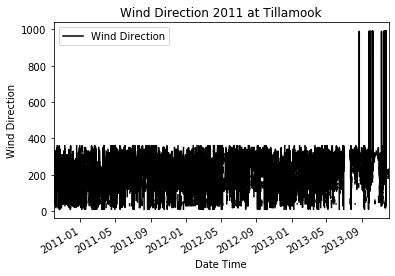

In [63]:
WDir2011TPlot = df_WD2011T.plot(kind='line',color='black', y='Wind Direction')
WDir2011TPlot.set_title("Wind Direction 2011 at Tillamook")
WDir2011TPlot.set_xlabel('Date Time')
WDir2011TPlot.set_ylabel('Wind Direction')

Text(0, 0.5, 'Wind Speed (m/s)')

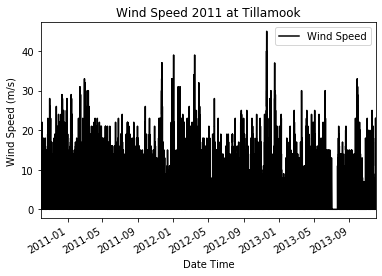

In [64]:
WS2011TPlot = df_WD2011T.plot(kind='line',color='black', y='Wind Speed')
WS2011TPlot.set_title("Wind Speed 2011 at Tillamook")
WS2011TPlot.set_xlabel('Date Time')
WS2011TPlot.set_ylabel('Wind Speed (m/s)')

Text(0, 0.5, 'Wind Gust Speed (m/s)')

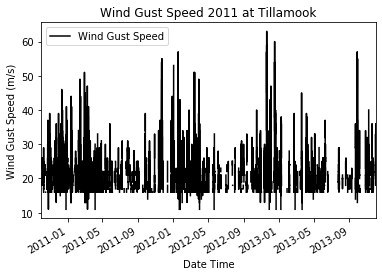

In [65]:
WGS2011TPlot = df_WD2011T.plot(kind='line',color='black', y='Wind Gust Speed')
WGS2011TPlot.set_title("Wind Gust Speed 2011 at Tillamook")
WGS2011TPlot.set_xlabel('Date Time')
WGS2011TPlot.set_ylabel('Wind Gust Speed (m/s)')

Text(0, 0.5, 'Air Temperature')

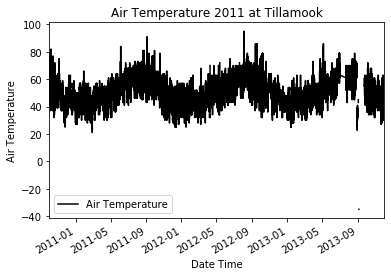

In [66]:
AT2011TPlot = df_WD2011T.plot(kind='line',color='black', y='Air Temperature')
AT2011TPlot.set_title("Air Temperature 2011 at Tillamook")
AT2011TPlot.set_xlabel('Date Time')
AT2011TPlot.set_ylabel('Air Temperature')

## Step Three - Statistical Tests

* Correlation between variables - compare changes in direction or magnitude between COVIS plume bending and weather data (or current data at the regional circulation mooring.

* Extract periodicities - Will need to use Lomb-Spargle method.  We will have to look up documentation.  In the meantime, might be useful to look up python modules for power spectrum and play with some data.  Will need to be gap-free for standard method.  Can try synthetic data (add a bunch of sines and cosines at different frequencies and see how they come out of power spectrum).
